In [1]:
import pandas as pd # panda is imported to read datasets

train = pd.read_csv("E:/DS_ML_CodeStudio/Dataset/titanic/train.csv") # read train datasets
test = pd.read_csv("E:/DS_ML_CodeStudio/Dataset/titanic/test.csv") # read test datasets

In [2]:
import numpy as np

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape # train data - row and column size

(891, 12)

In [5]:
test.shape # test data - row and column size

(418, 11)

In [6]:
train.info() # contains info about data types, number of data availabe, column name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Age, Cabin, Embarked --> Data Missing

In [7]:
test.info() # contains info about data types, number of data availabe, column name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum() # shows no. of data in a column missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum() # shows no. of data in a column missing

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
import matplotlib.pyplot as plt # call matplotlib 
%matplotlib inline # magic function

UsageError: unrecognized arguments: # magic function


In [11]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    
    df.plot(kind='bar')

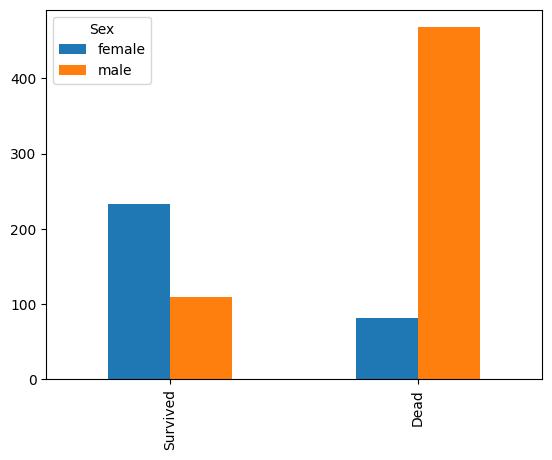

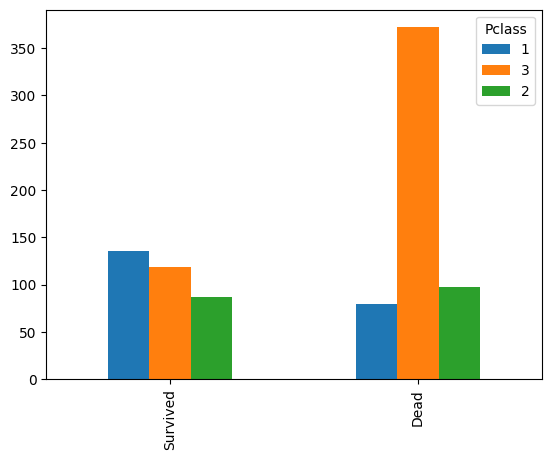

In [12]:
# plotting a bar_chart and classfying them on the basis of dead or alive
bar_chart('Sex') # plotting a bar_chart of gender 
bar_chart('Pclass') # plotting a bar_chart of class 

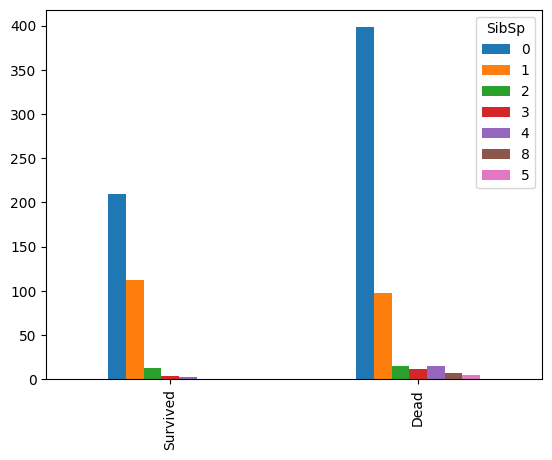

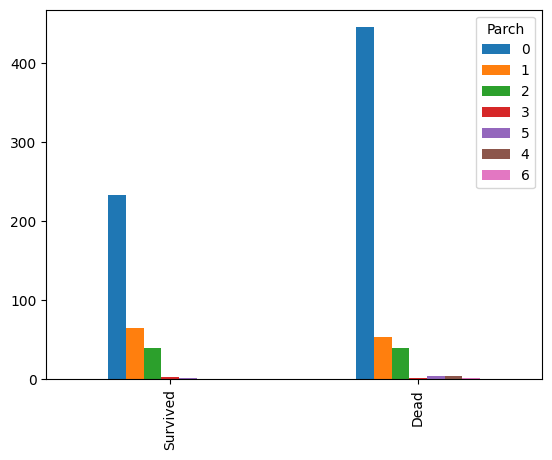

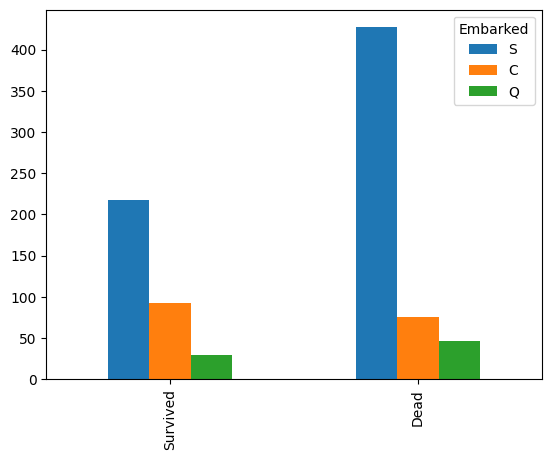

In [13]:
# plotting a bar_chart and classfying them on the basis of dead or alive 
bar_chart('SibSp')    # plotting a bar_chart of siblings/spouse 
bar_chart('Parch')    # plotting a bar_chart of parch 
bar_chart('Embarked') # plotting a bar_chart from where they embarked 

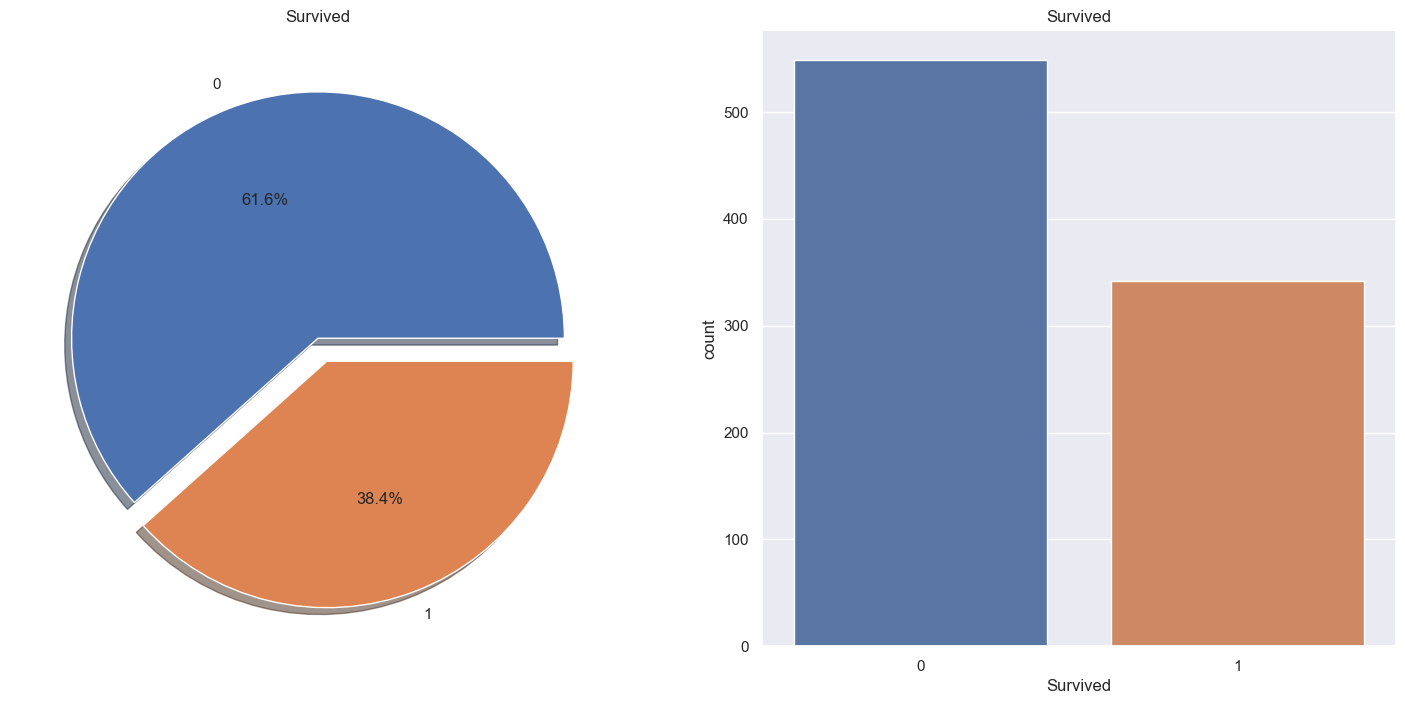

In [14]:
# plotting survival rate -dead or alive
import seaborn as sns # call seaborn 
sns.set()
f, ax = plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [15]:
# Ordinal feature - visualizing people from which class survived how much
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


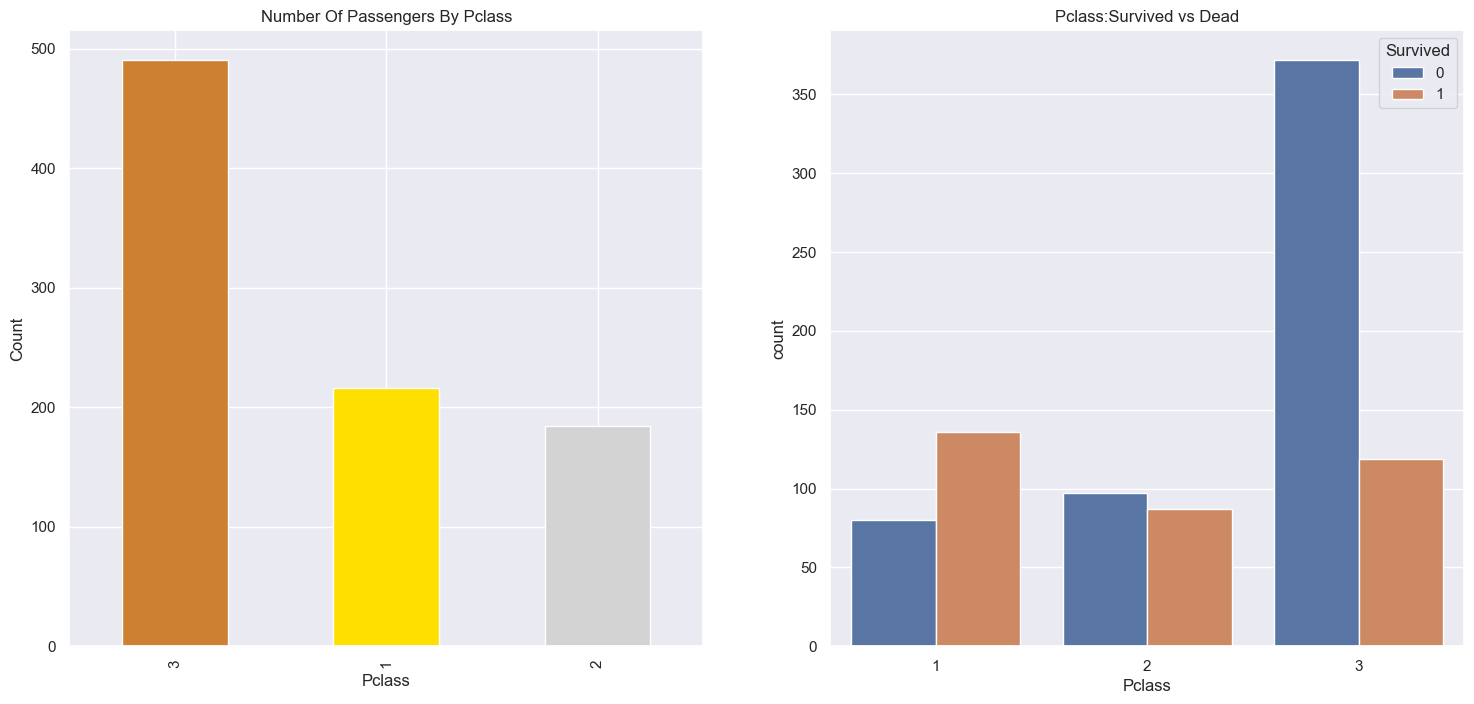

In [16]:
f,ax=plt.subplots(1, 2, figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass',hue='Survived',data=train, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [17]:
# Ordinal feature - visualizing people from which gender survived how much
pd.crosstab([train.Sex, train.Survived], 
            train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

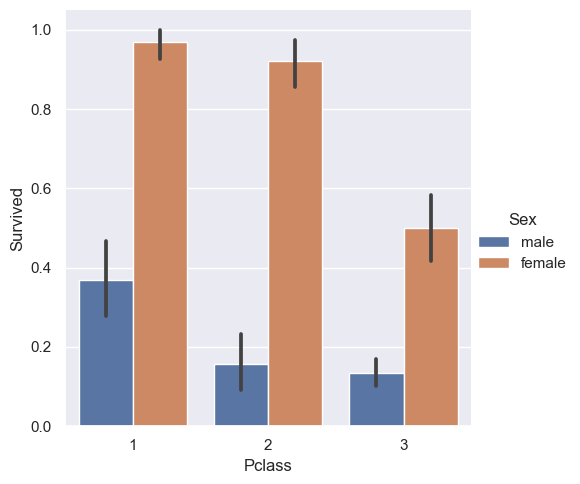

In [18]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=train)
plt.show()

In [19]:
# Continuous

In [20]:
print(f"Oldest: {train['Age'].max()} \nYoungest: {train['Age'].min()} \nAverage: {train['Age'].mean()}")

Oldest: 80.0 
Youngest: 0.42 
Average: 29.69911764705882


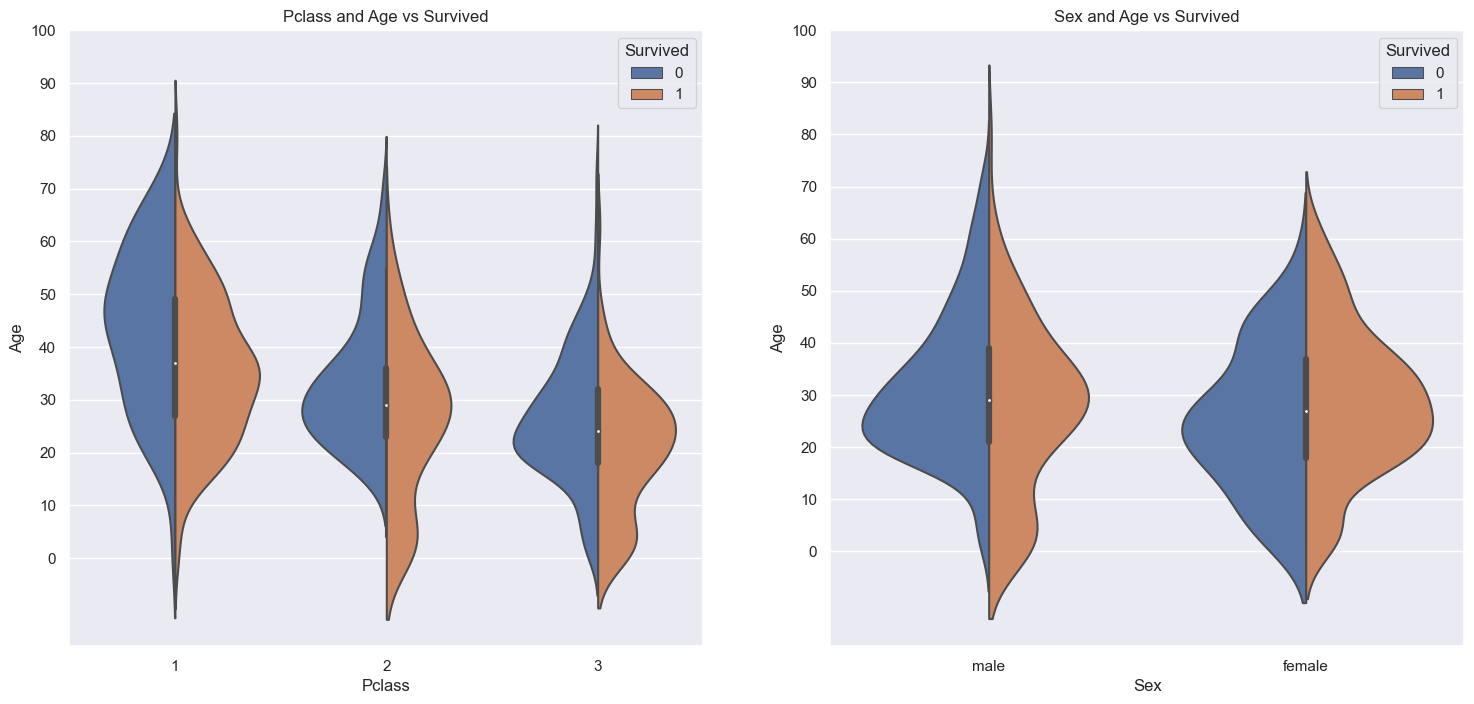

In [21]:
f,ax=plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x = "Pclass",y = "Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x = "Sex",y = "Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### Feature Engineering

In [22]:
# creating a new feature named title i.e., Mrs,Mr,Dr,Col etc.
train_test = [train, test]

for d in train_test:
    d['Title'] = d['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    # d[name].str.extract extract string from feature name
    # ([A-Za-z]+) means it will extract string strating with captial A to Z, continuing to small A to
    # z, here + indcates it might have more than one letter.

In [23]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [24]:
# Mapping
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for d in train_test:
    d['Title'] = d['Title'].map(title_mapping)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


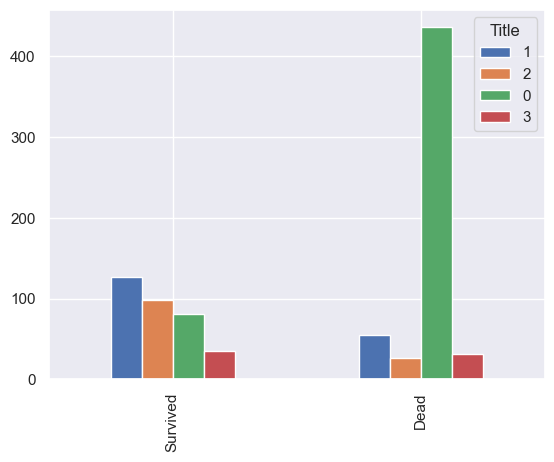

In [26]:
bar_chart('Title')

In [27]:
# .drop removes specified feature from datasets and 'inplace=true' save changes made.
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


### Missing Values

In [28]:
grouping = train.groupby("Title")["Age"]

train['Age'].fillna(grouping.transform("mean"), inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [29]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

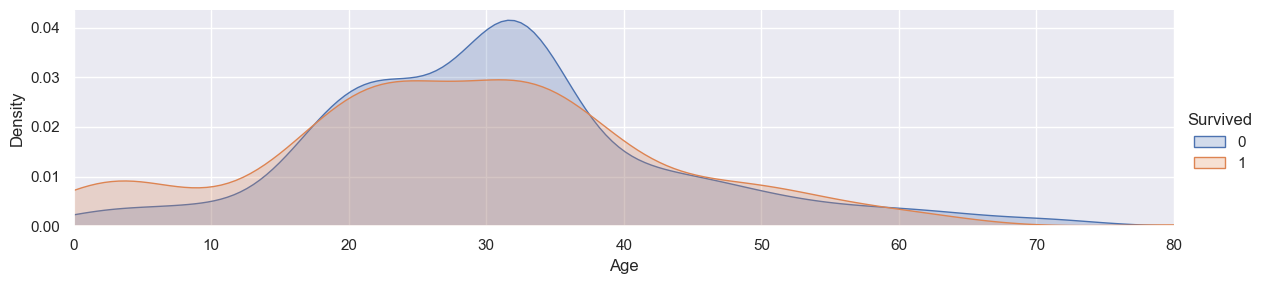

In [30]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

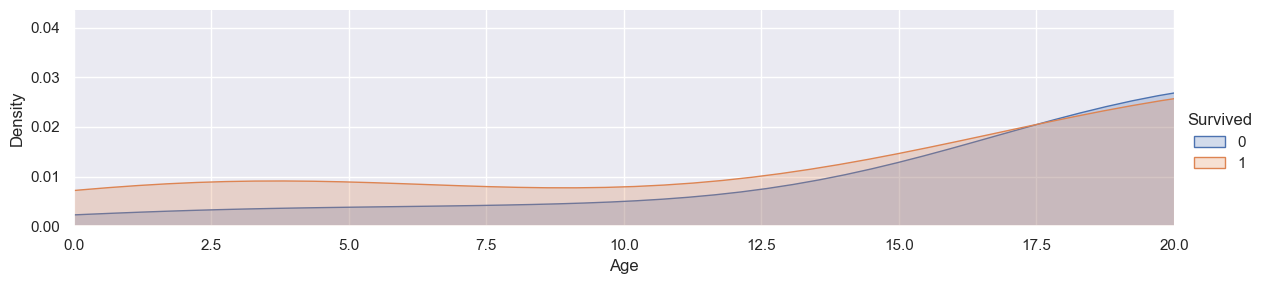

In [31]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

plt.show()

In [32]:
# listing on the basis of different age groups
for dataset in train_test:
    dataset.loc[ dataset['Age'] <= 16 , 'Age'] = 5
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

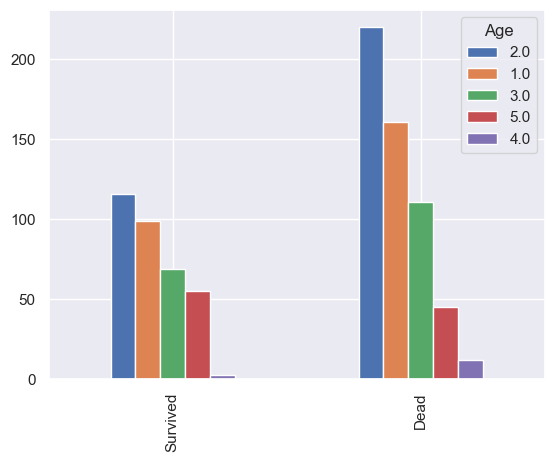

In [33]:
bar_chart('Age')

In [34]:
# filling missing values in 'embarked' 
p1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
p2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
p3 = train[train['Pclass'] == 3]['Embarked'].value_counts()

classes = pd.DataFrame([p1, p2, p3])
classes.index = ['1', '2', '3']
classes.head()

Embarked,S,C,Q
1,127,85,2
2,164,17,3
3,353,66,72


<Axes: >

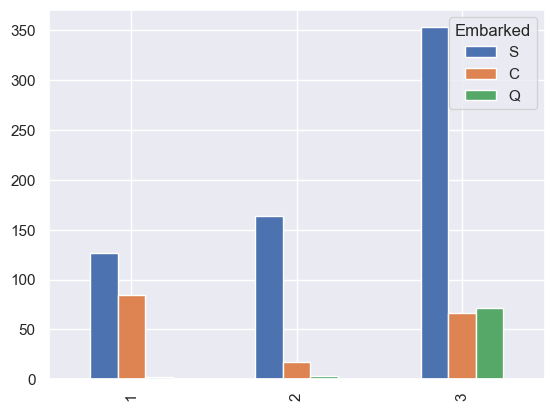

In [35]:
classes.plot(kind='bar')

In [36]:
for d in train_test:
    d['Embarked'] = d['Embarked'].fillna('S') # filling null values in embarked with 'S' as its median

In [37]:
train.Embarked.isnull().sum()

0

In [38]:
# title mapping
embarked_mapping = {"S": 0, "C": 1, "Q": 2}

for d in train_test:
    d['Embarked'] = d['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,0,0


In [39]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [40]:
for d in train_test:
    d['Cabin'] = d['Cabin'].str[:1] # slicing to shorten cabin names/string
    
p1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
p2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
p3 = train[train['Pclass'] == 3]['Cabin'].value_counts()

cabins = pd.DataFrame([p1, p2, p3])
cabins.index = ['1', '2', '3']
cabins.head()

Cabin,C,B,D,E,A,T,F,G
1,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
2,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
3,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


<Axes: >

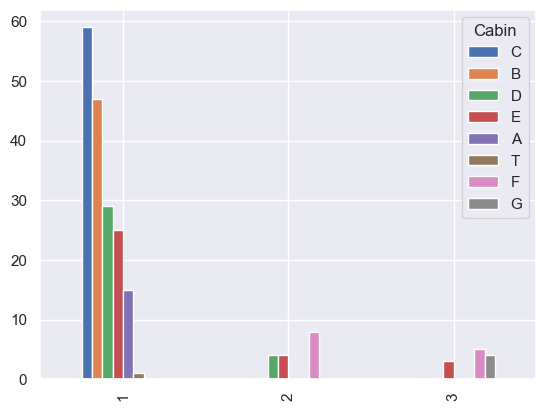

In [41]:
cabins.plot(kind='bar')

In [42]:
# feature scaling
cabin_mapping = {"A": 0, "B": 0.5, "C": 1.0, "D": 1.5, "E": 2.0, "F": 2.5, "G": 3.0}
# mapping
for d in train_test:
    d['Cabin'] = d['Cabin'].map(cabin_mapping)

In [43]:
# filling missing values in 'cabin' 
grouping_class = train.groupby("Pclass")["Cabin"]

train['Cabin'].fillna(grouping_class.transform("median"), inplace=True)

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

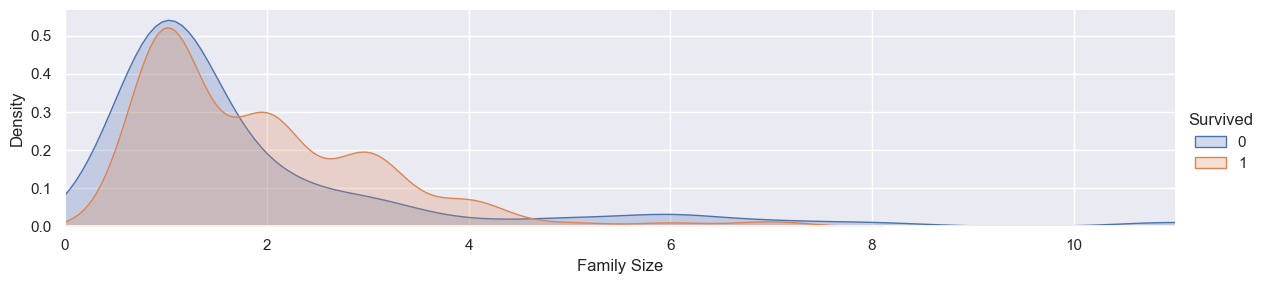

In [44]:
train["Family Size"] = train.SibSp + train.Parch + 1

facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Family Size' ,fill= True)
facet.set(xlim=(0, train['Family Size'].max()))
facet.add_legend()

plt.show()

In [45]:
train['Family Size']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Family Size, Length: 891, dtype: int64

In [46]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}

train['Family Size'] = train['Family Size'].map(family_mapping)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Size
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,2.5,0,0,0.4
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,1.0,1,2,0.4
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,2.5,0,1,0.0
3,4,1,1,female,2.0,1,0,113803,53.1000,1.0,0,2,0.4
4,5,0,3,male,2.0,0,0,373450,8.0500,2.5,0,0,0.0


In [48]:
train.drop(['PassengerId', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)
train.shape

(891, 9)

In [49]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family Size
0,0,3,male,1.0,7.2500,2.5,0,0,0.4
1,1,1,female,3.0,71.2833,1.0,1,2,0.4
2,1,3,female,1.0,7.9250,2.5,0,1,0.0
3,1,1,female,2.0,53.1000,1.0,0,2,0.4
4,0,3,male,2.0,8.0500,2.5,0,0,0.0


In [50]:
target = train.Survived
train.drop('Survived', axis = 1, inplace=True)

In [51]:
sex_mapping = {"male": 0, "female": 1}

train['Sex'] = train['Sex'].map(sex_mapping)

### Machine Learning

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    int64  
 2   Age          891 non-null    float64
 3   Fare         891 non-null    float64
 4   Cabin        891 non-null    float64
 5   Embarked     891 non-null    int64  
 6   Title        891 non-null    int64  
 7   Family Size  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [55]:
from sklearn.model_selection import KFold
from sklearn. model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [56]:
# Decision Tree
clf_dt = DecisionTreeClassifier()
score = cross_val_score(clf_dt, train, target, cv=k_fold, scoring='accuracy')
score

array([0.77777778, 0.82022472, 0.80898876, 0.78651685, 0.78651685,
       0.7752809 , 0.78651685, 0.79775281, 0.78651685, 0.80898876])

In [57]:
np.mean(score)*100

79.35081148564295

In [58]:
# Random Forest
clf_rf = RandomForestClassifier()
score = cross_val_score(clf_rf, train, target, cv=k_fold, scoring='accuracy')
score

array([0.76666667, 0.84269663, 0.83146067, 0.79775281, 0.85393258,
       0.78651685, 0.80898876, 0.79775281, 0.7752809 , 0.80898876])

In [59]:
np.mean(score)*100

80.70037453183521